In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['Alcohol','Malic_acid','Ash','Alcalinity_of_ash',
                      'Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols',
                      'Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines',
                      'Proline'],
    class_var = 'class'
)

In [ ]:
exp = Experiment('data/wine.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=5e-3,
                 weight_decay=1e-7,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20,25,30])

In [ ]:
%time clustering_scores = exp.test_clustering_performance()

In [ ]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

In [ ]:
%time clf_scores = exp.test_classification_performance(cv=3)

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=100, lr=5e-3, weight_decay=1e-7, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.4992852807044983
[12, 11, 13, 12, 11, 8, 12, 10, 12, 8, 11, 14, 13]
>>> Epoch = 2, Loss = 0.31110095977783203
[12, 11, 13, 12, 6, 8, 9, 8, 12, 8, 7, 9, 7]
>>> Epoch = 3, Loss = 0.24807237088680267
[7, 12, 4, 12, 6, 7, 9, 8, 12, 8, 5, 9, 12]
>>> Epoch = 4, Loss = 0.24617737531661987
[7, 12, 12, 12, 6, 8, 12, 8, 13, 8, 11, 14, 12]
>>> Epoch = 5, Loss = 0.24336488544940948
[6, 10, 13, 12, 9, 8, 12, 7, 14, 8, 11, 12, 12]
>>> Epoch = 6, Loss = 0.23445934057235718
[13, 10, 13, 12, 9, 8, 12, 8, 14, 8, 9, 12, 9]
0 5
>>> Epoch = 7, Loss = 0.23175501823425293
[5, 10, 14, 12, 11, 8, 12, 12, 11, 8, 9, 12, 9]
0 5
>>> Epoch = 8, Loss = 0.2312963753938675
[5, 10, 13, 12, 11, 8, 12, 13, 11, 8, 9, 10, 9]
0 5
>>> Epoch = 9, Loss = 0.23219747841358185
[5, 11, 13, 12, 11, 8, 13, 13, 11, 8, 9, 10, 12]
0 5
>>> Epoch = 10, Loss = 0.228739395737648
[5, 11, 13, 12, 11, 8, 13, 12, 11, 8, 9, 10, 12]
0 5
>>> Epoch = 11, Loss = 0.22994746267795563
[13, 11, 13, 12, 11, 8, 13, 12, 11, 8, 9, 1

>>> Epoch = 93, Loss = 0.2208598405122757
[2, 2, 6, 8, 6, 2, 3, 10, 4, 5, 2, 2, 2]
0 5
>>> Epoch = 94, Loss = 0.22584697604179382
[2, 2, 11, 8, 6, 2, 3, 8, 4, 5, 2, 2, 9]
0 5
>>> Epoch = 95, Loss = 0.21994391083717346
[2, 2, 11, 8, 6, 2, 3, 10, 4, 5, 2, 2, 9]
0 5
>>> Epoch = 96, Loss = 0.2274477183818817
[2, 2, 11, 8, 6, 2, 3, 10, 4, 5, 2, 2, 2]
0 5
>>> Epoch = 97, Loss = 0.22485126554965973
[2, 2, 11, 8, 6, 3, 3, 10, 4, 5, 2, 2, 2]
0 5
>>> Epoch = 98, Loss = 0.22170887887477875
[2, 2, 11, 4, 6, 2, 3, 12, 4, 5, 2, 2, 9]
0 5
>>> Epoch = 99, Loss = 0.22212310135364532
[2, 2, 11, 4, 6, 3, 3, 12, 4, 5, 2, 2, 2]
0 5
>>> Epoch = 100, Loss = 0.21894772350788116
[2, 2, 11, 8, 6, 2, 3, 10, 4, 5, 2, 2, 2]
1 5
2 5
Embedding Failed to Converge in given #epochs..


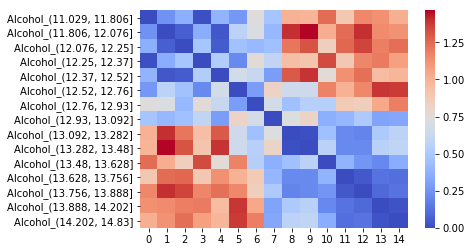

In [5]:
sb.plot_pairwise_distance_between_bins('Alcohol')

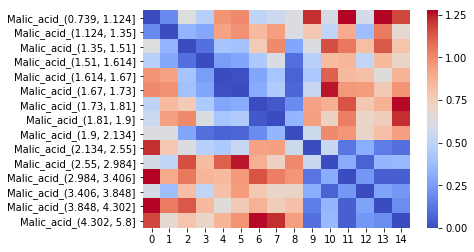

In [6]:
sb.plot_pairwise_distance_between_bins('Malic_acid')

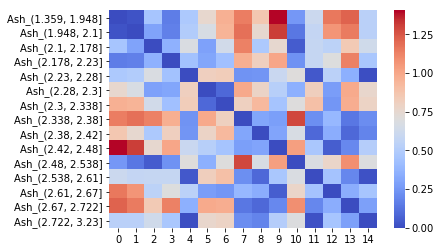

In [7]:
sb.plot_pairwise_distance_between_bins('Ash')

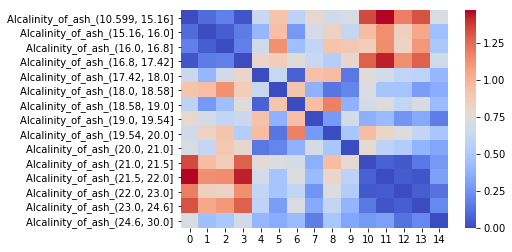

In [8]:
sb.plot_pairwise_distance_between_bins('Alcalinity_of_ash')

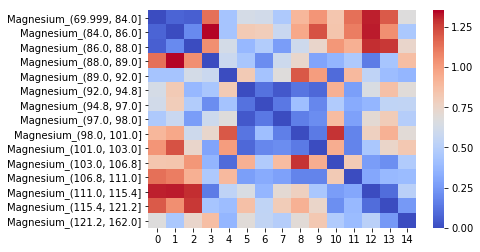

In [9]:
sb.plot_pairwise_distance_between_bins('Magnesium')

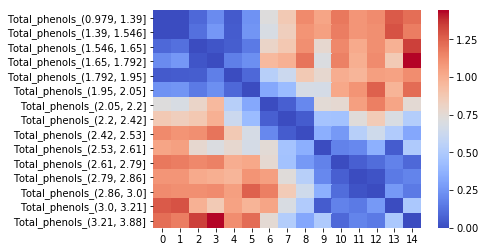

In [10]:
sb.plot_pairwise_distance_between_bins('Total_phenols')

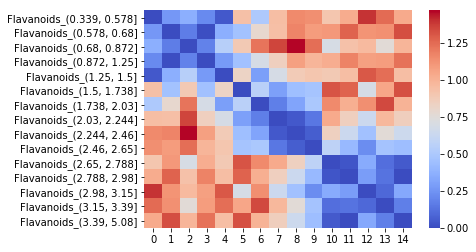

In [11]:
sb.plot_pairwise_distance_between_bins('Flavanoids')

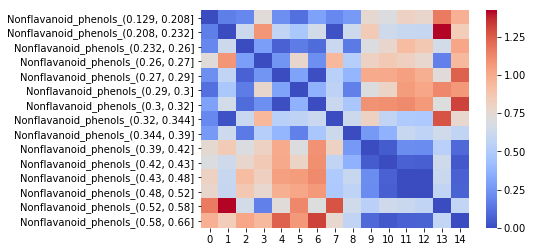

In [12]:
sb.plot_pairwise_distance_between_bins('Nonflavanoid_phenols')

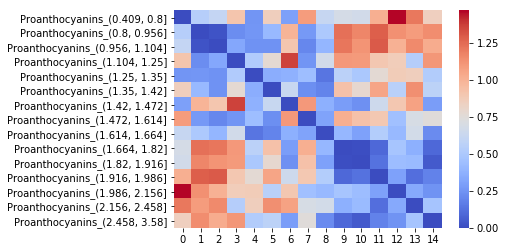

In [13]:
sb.plot_pairwise_distance_between_bins('Proanthocyanins')

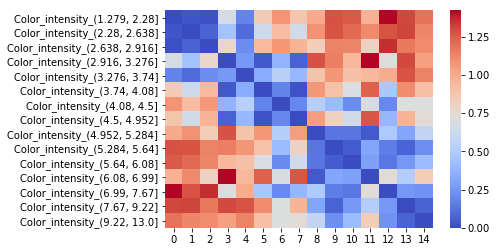

In [14]:
sb.plot_pairwise_distance_between_bins('Color_intensity')

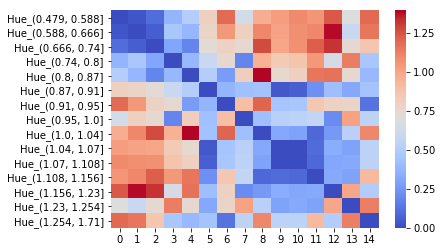

In [15]:
sb.plot_pairwise_distance_between_bins('Hue')

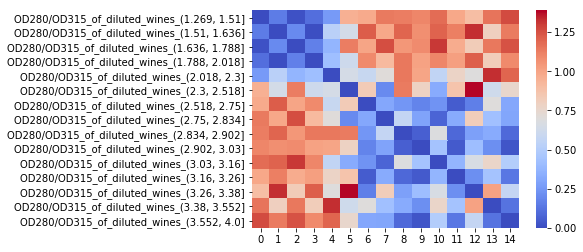

In [16]:
sb.plot_pairwise_distance_between_bins('OD280/OD315_of_diluted_wines')

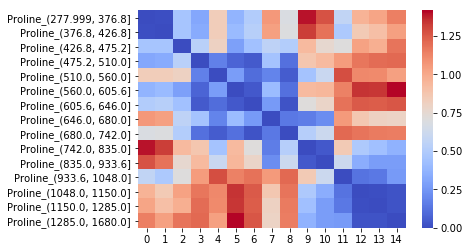

In [17]:
sb.plot_pairwise_distance_between_bins('Proline')

In [18]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Alcohol
['(11.029, 13.092]', '(13.092, 14.83]']
Malic_acid
['(0.739, 2.134]', '(2.134, 5.8]']
Ash
['(1.359, 2.23]', '(2.23, 2.28]', '(2.28, 2.338]', '(2.338, 2.38]', '(2.38, 2.42]', '(2.42, 2.48]', '(2.48, 2.538]', '(2.538, 2.61]', '(2.61, 2.67]', '(2.67, 2.722]', '(2.722, 3.23]']
Alcalinity_of_ash
['(10.599, 17.42]', '(17.42, 18.0]', '(18.0, 18.58]', '(18.58, 19.0]', '(19.0, 20.0]', '(20.0, 21.0]', '(21.0, 24.6]', '(24.6, 30.0]']
Magnesium
['(69.999, 88.0]', '(88.0, 92.0]', '(92.0, 103.0]', '(103.0, 106.8]', '(106.8, 111.0]', '(111.0, 162.0]']
Total_phenols
['(0.979, 2.2]', '(2.2, 3.88]']
Flavanoids
['(0.339, 1.5]', '(1.5, 2.65]', '(2.65, 5.08]']
Nonflavanoid_phenols
['(0.129, 0.208]', '(0.208, 0.232]', '(0.232, 0.26]', '(0.26, 0.27]', '(0.27, 0.32]', '(0.32, 0.344]', '(0.344, 0.39]', '(0.39, 0.52]', '(0.52, 0.58]', '(0.58, 0.66]']
Proanthocyanins
['(0.409, 1.42]', '(1.42, 1.472]', '(1.472, 1.664]', '(1.664, 3.58]']
Color_intensity
['(1.279, 2.916]', '(2.916, 3.276]', '(3.276, 3.74]',